In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#  Import Libraries

In [49]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers,models,Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision
from PIL import Image
import os
import shutil
import json
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input
import pandas as pd

# Loading The Data

In [34]:
train_dataset = image_dataset_from_directory('/kaggle/input/butterfly-images40-species/train',
                                             shuffle=True,
                                             batch_size= 25,
                                             image_size= (224,224),
                                             seed=42)

Found 12594 files belonging to 100 classes.


In [35]:
class_labels = train_dataset.class_names

In [36]:
class_labels

['ADONIS',
 'AFRICAN GIANT SWALLOWTAIL',
 'AMERICAN SNOOT',
 'AN 88',
 'APPOLLO',
 'ARCIGERA FLOWER MOTH',
 'ATALA',
 'ATLAS MOTH',
 'BANDED ORANGE HELICONIAN',
 'BANDED PEACOCK',
 'BANDED TIGER MOTH',
 'BECKERS WHITE',
 'BIRD CHERRY ERMINE MOTH',
 'BLACK HAIRSTREAK',
 'BLUE MORPHO',
 'BLUE SPOTTED CROW',
 'BROOKES BIRDWING',
 'BROWN ARGUS',
 'BROWN SIPROETA',
 'CABBAGE WHITE',
 'CAIRNS BIRDWING',
 'CHALK HILL BLUE',
 'CHECQUERED SKIPPER',
 'CHESTNUT',
 'CINNABAR MOTH',
 'CLEARWING MOTH',
 'CLEOPATRA',
 'CLODIUS PARNASSIAN',
 'CLOUDED SULPHUR',
 'COMET MOTH',
 'COMMON BANDED AWL',
 'COMMON WOOD-NYMPH',
 'COPPER TAIL',
 'CRECENT',
 'CRIMSON PATCH',
 'DANAID EGGFLY',
 'EASTERN COMA',
 'EASTERN DAPPLE WHITE',
 'EASTERN PINE ELFIN',
 'ELBOWED PIERROT',
 'EMPEROR GUM MOTH',
 'GARDEN TIGER MOTH',
 'GIANT LEOPARD MOTH',
 'GLITTERING SAPPHIRE',
 'GOLD BANDED',
 'GREAT EGGFLY',
 'GREAT JAY',
 'GREEN CELLED CATTLEHEART',
 'GREEN HAIRSTREAK',
 'GREY HAIRSTREAK',
 'HERCULES MOTH',
 'HUMMING BIRD H

In [6]:
validation_dataset = image_dataset_from_directory('/kaggle/input/butterfly-images40-species/valid',
                                             shuffle=True,
                                             batch_size= 25,
                                             image_size= (224,224),
                                             seed=42)


Found 500 files belonging to 100 classes.


# Data Augmentation and Prefetching for Training

In [7]:
autotune = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=autotune)

In [11]:
def data_augmenter():
    
    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip('horizontal'))
    data_augmentation.add(RandomRotation(0.2))
    data_augmentation.add(RandomZoom(0.2))
    
    return data_augmentation

# Object from data_augmenter()

data_augmentation = data_augmenter()

# Creating, Compiling ,Training and Evaluation MobileNetV2 Model

In [18]:
#1
preprocess_input_mobileNet = tf.keras.applications.mobilenet_v2.preprocess_input

#2
model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3),
                                                   include_top = False,
                                                   weights= 'imagenet')

#3
inputs = tf.keras.Input(shape = (224, 224, 3))

x = data_augmentation(inputs)
x = preprocess_input_mobileNet(x)
x = model(x) 
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dropout(rate = 0.2)(x)

outputs = layers.Dense(units = 100, activation = 'linear')(x)

Last_model = tf.keras.Model(inputs, outputs)
Last_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                           

Epoch 1/20
504/504 [==============================] - 555s 1s/step - loss: 1.7266 - accuracy: 0.6297 - val_loss: 0.9056 - val_accuracy: 0.7260 - lr: 1.0000e-04
Epoch 2/20
504/504 [==============================] - 538s 1s/step - loss: 0.4603 - accuracy: 0.8804 - val_loss: 0.2993 - val_accuracy: 0.9140 - lr: 1.0000e-04
Epoch 3/20
504/504 [==============================] - 540s 1s/step - loss: 0.3103 - accuracy: 0.9181 - val_loss: 0.2511 - val_accuracy: 0.9260 - lr: 1.0000e-04
Epoch 4/20
504/504 [==============================] - 545s 1s/step - loss: 0.2425 - accuracy: 0.9343 - val_loss: 0.2248 - val_accuracy: 0.9380 - lr: 1.0000e-04
Epoch 5/20
504/504 [==============================] - 545s 1s/step - loss: 0.1940 - accuracy: 0.9451 - val_loss: 0.2121 - val_accuracy: 0.9380 - lr: 1.0000e-04
Epoch 6/20
504/504 [==============================] - 534s 1s/step - loss: 0.1635 - accuracy: 0.9533 - val_loss: 0.2098 - val_accuracy: 0.9440 - lr: 1.0000e-04
Epoch 7/20
504/504 [====================

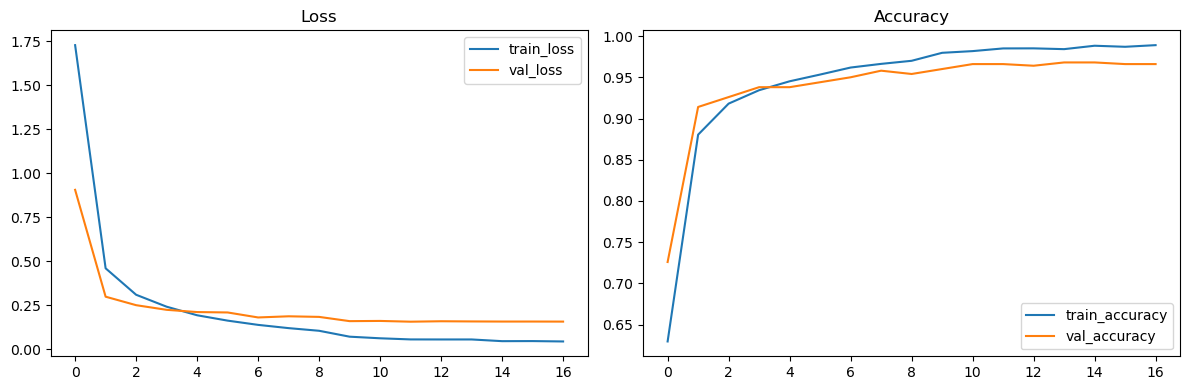

In [40]:
# Compile the model
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

Last_model.compile(loss=loss_function,
                   optimizer=optimizer,
                   metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=2)

# Fit the model
history = Last_model.fit(train_dataset,
                         epochs=20,
                         validation_data=validation_dataset,
                         callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

# Test Predictions

In [41]:
test_dir = '/kaggle/input/applai-cv-st23-assignment-3'

In [50]:
test_filenames = []
for root, dirs, files in os.walk(test_dir):
    for filename in files:
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            test_filenames.append(os.path.join(root, filename))

class_labels = class_labelss
ids = []
predictions = []

for img_path in test_filenames:
    img_name = os.path.basename(img_path)
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = Last_model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_class_index]
    
    ids.append("test"+fr"\{''}" + img_name)
    predictions.append(predicted_class)


results_df = pd.DataFrame({'ID': ids, 'Prediction': predictions})
results_df.to_csv('Submission_file.csv', index=False)

1/1 [==============================] - 0s 59ms/step
